<a href="https://colab.research.google.com/github/daniel-lima-lopez/Red-de-Hopfield/blob/main/Hopfield_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diseño de una red de Hopfield general
* Recibe una lista $t$ de patrones a recordar
* Cada patron es una cadana de +1 y -1
* El constructor de la clase se encaraga de calcular los pesos adecuados para la red
* El metodo $evaluate(x)$ evalua a la entrada $x$ con la red creada y regresa los patrones generados en cada iteracion antes de converger

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

class Hoppfield:
  def __init__(self, t):
    self.patterns = t
    self.n = len(t) # numero de patrones a aprender
    self.dim = len(t[0]) # dimension del problema (dimension de cada patron)
    
    # ------------ CALCULO DE PESOS ------------
    self.W = np.zeros(shape=(self.dim,self.dim))
    for i in range(self.n):
      v1 = np.reshape(t[i], (self.dim,1))
      v2 = np.reshape(t[i], (1,self.dim))
      self.W += np.matmul(v1,v2)

    # eliminamos diagonal
    for i in range(self.dim):
      self.W[i,i] = 0.

     

    #print(self.W, self.net, self.out)

  def euclideanD(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))    

  def evaluate(self, x):
    x = np.reshape(x, (self.dim,))
    self.net = np.zeros(shape=(1,self.dim)) 
    self.out = np.zeros(shape=(1,self.dim))  

    it = 0
    historic = []
    while True:
      if it==0: # primera iteracion
        self.out = x.copy()
      else:
        ins = self.out.copy() # copiamos la salida k-esima
        
        # calculo de la salida k+1
        self.net = np.matmul(ins, self.W) 
        #print('net: ', self.net)
    
        # funcion de activacion escalon
        for i, ni in enumerate(self.net):
          if ni >= 0:
            self.out[i] = 1.
          else:
            self.out[i] = -1
        
        #print(self.out, ins)
        if np.array_equal(self.out, ins): # si se repite con el de una o dos iteraciones atras
          #print('iteracion: ', it, 'out: ', self.out)
          historic.append(self.out.copy())
          break
      #print('iteracion: ', it, 'out: ', self.out)
      historic.append(self.out.copy())
      it += 1
    # verificamos si el ultimo elemento es en realidad un patron ingresado
    aux = False
    for pi in self.patterns:
      if np.array_equal(historic[-1], pi):
        aux = True
    # de no ser asi se reemplaza por el elemento mas cercano
    if not aux:
      distances = np.array([self.euclideanD(historic[-1], pi) for pi in self.patterns])
      ni = np.argsort(distances)[0] # indice del mas cercanos
      historic.append(self.patterns[ni])


    return historic

## Metodos para manejar imagenes
* $img\_to\_flat(img)$: toma la una imagen (matriz) binarizada (intensidades 0 y 255), y la convierte en una lista unidimensional con entradas +1 para intensidades 255 y -1 para intensidades 0.
* $flat\_to\_img(flat)$: realiza el proceso inverso al metodo anterior, toma una lista de valores +1 y -1, y devuelve una imagen binarizada
* $plot\_historic(historic)$: muestra las imagenes obtenidas en cada iteracion previa a converger en la evaluacion de la red

In [2]:
def img_to_flat(img): # considera imagenes cuadradas (dim, dim)
  dim = len(img)
  aux = []
  for ri in range(len(img)):
    for ci in range(len(img[0])):
      if img[ri, ci, 0] == 0:
        aux.append(-1.)
      else:
        aux.append(1.)
  return np.array(aux)

def flat_to_img(flat, r, c):
  dim = int(np.sqrt(len(flat)))
  img = np.zeros(shape=(r, c, 3), dtype=np.uint8)

  i = 0
  for ri in range(r):
    for ci in range(c):
      if flat[i] == 1.:
        img[ri, ci] = [255,255,255]
      i += 1
  
  return img

def plot_historic(historic, r, c):
  n = len(historic)

  for i in range(n):
    img = flat_to_img(historic[i], r, c)
    auxp = plt.subplot(1,n,i+1)
    auxp.get_xaxis().set_visible(False)
    auxp.get_yaxis().set_visible(False)
    auxp.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  
  plt.show()

## Procedimiento
Se eligieron dos patrones a memorizar, los simbolos de un tablero de gato: $x$ y $o$

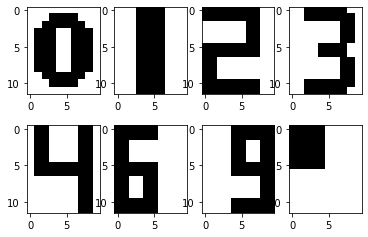

In [3]:
imagenes = [cv.imread('train/0.png'), cv.imread('train/1.png'), cv.imread('train/2.png'), cv.imread('train/3.png'),
            cv.imread('train/4.png'), cv.imread('train/6.png'), cv.imread('train/9.png'), cv.imread('train/d.png')]
for i, img in enumerate(imagenes):
  plt.subplot(2,4,i+1)
  plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

Se declara una instancia de un Red de Hopfield con estos patrones. Note que estos patrones son ortogonales

In [4]:
patterns = [img_to_flat(img) for img in imagenes]
NN = Hoppfield(patterns)

for i in range(0,len(patterns)-1):
  for j in range(i+1, len(patterns)):
    aux = 0
    for k in range(len(patterns[0])):
      aux += patterns[i][k]*patterns[j][k]
    print('dot (',i,',',j,'): ', aux)

dot ( 0 , 1 ):  24.0
dot ( 0 , 2 ):  -8.0
dot ( 0 , 3 ):  4.0
dot ( 0 , 4 ):  24.0
dot ( 0 , 5 ):  -28.0
dot ( 0 , 6 ):  -28.0
dot ( 0 , 7 ):  4.0
dot ( 1 , 2 ):  12.0
dot ( 1 , 3 ):  20.0
dot ( 1 , 4 ):  -36.0
dot ( 1 , 5 ):  12.0
dot ( 1 , 6 ):  12.0
dot ( 1 , 7 ):  12.0
dot ( 2 , 3 ):  48.0
dot ( 2 , 4 ):  8.0
dot ( 2 , 5 ):  60.0
dot ( 2 , 6 ):  -12.0
dot ( 2 , 7 ):  0.0
dot ( 3 , 4 ):  48.0
dot ( 3 , 5 ):  0.0
dot ( 3 , 6 ):  48.0
dot ( 3 , 7 ):  -4.0
dot ( 4 , 5 ):  -12.0
dot ( 4 , 6 ):  16.0
dot ( 4 , 7 ):  24.0
dot ( 5 , 6 ):  -48.0
dot ( 5 , 7 ):  36.0
dot ( 6 , 7 ):  -24.0


Veamos que los patrones originales convergen cuando se ingresan a la red

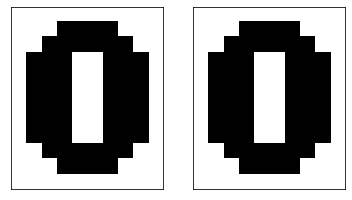

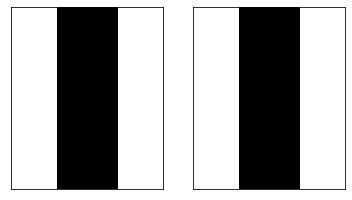

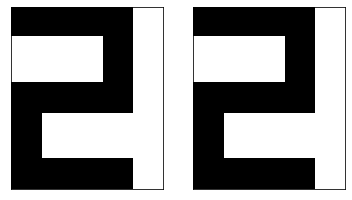

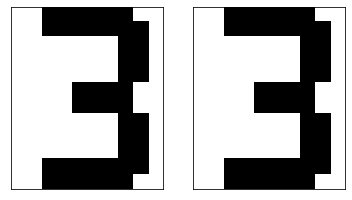

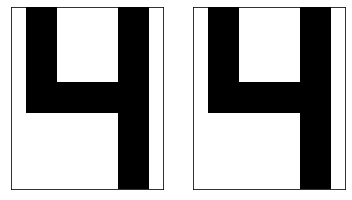

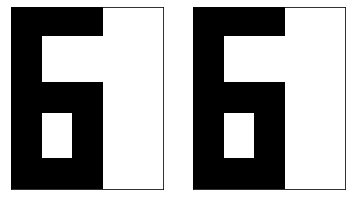

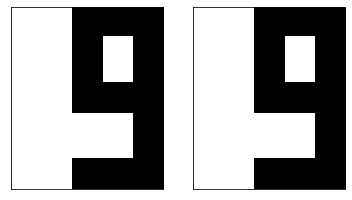

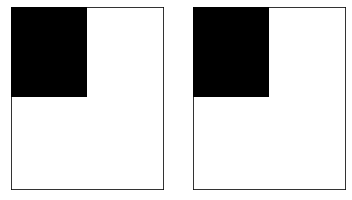

In [5]:
test_img = [cv.imread('train/0.png'), cv.imread('train/1.png'), cv.imread('train/2.png'), cv.imread('train/3.png'),
            cv.imread('train/4.png'), cv.imread('train/6.png'), cv.imread('train/9.png'), cv.imread('train/d.png')]
test_flat = [img_to_flat(img) for img in test_img]
historics = [NN.evaluate(fi) for fi in test_flat]

for hi in historics:
  plot_historic(hi,12, 10)

Verificamos con nuevas instancias

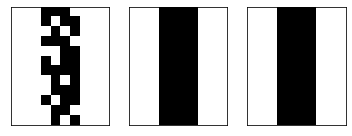

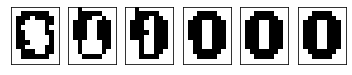

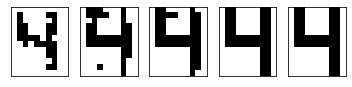

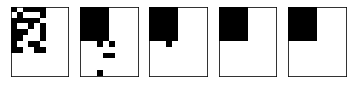

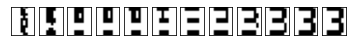

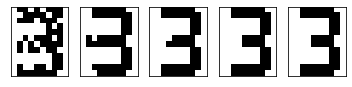

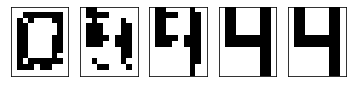

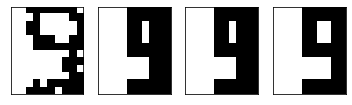

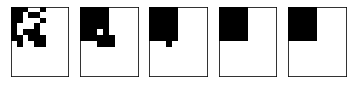

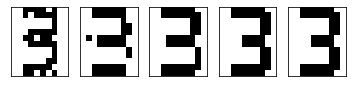

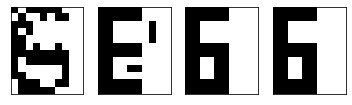

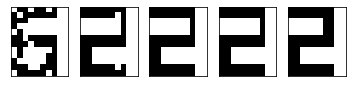

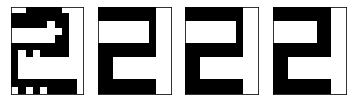

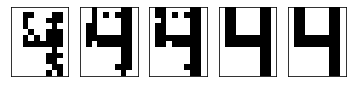

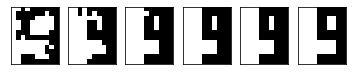

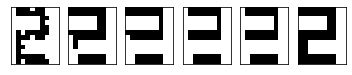

In [6]:
test_img = [cv.imread('test/test1.png'), cv.imread('test/test2.png'), cv.imread('test/test3.png'), cv.imread('test/test4.png'),
            cv.imread('test/test5.png'), cv.imread('test/test6.png'), cv.imread('test/test7.png'), cv.imread('test/test8.png'),
            cv.imread('test/test9.png'), cv.imread('test/test10.png'), cv.imread('test/test11.png'), cv.imread('test/test12.png'),
            cv.imread('test/test13.png'), cv.imread('test/test14.png'), cv.imread('test/test15.png'), cv.imread('test/test16.png')]

test_flat = [img_to_flat(img) for img in test_img]
historics = [NN.evaluate(fi) for fi in test_flat]

for hi in historics:
  plot_historic(hi,12, 10)

A continuacion se implementa una funcion con la cual, una vez este entrenada la red, un usuario puede ingresar una imagen de $10\times 12$ pixeles y obtendra los estados previos a la convergencia de la red:

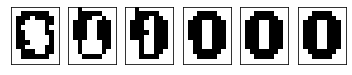

In [7]:
# funcion para el uso de cualquier usuario
def evaluar(img_path):
  img = cv.imread(img_path)
  flat = img_to_flat(img)
  historic = NN.evaluate(flat)
  plot_historic(historic, 12, 10)

# ejemplo de uso
evaluar('test/test2.png')
